Saving PCA variance plot for car data
Saving PCA contribution plot for car data
Saving PCA plot for car data
Saving PCA variance plot for customer data
Saving PCA contribution plot for customer data
Saving PCA plot for customer data


d:\ds5230-group2\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\ds5230-group2\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\error\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\error\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\error\AppData\Local\Programs\Python\Python312\Lib\s

Best parameters for car data:
n_clusters            2.000000
batch_size          256.000000
silhouette_score      0.195862
Name: 3, dtype: float64

Best parameters for customer data:
n_clusters          10.000000
batch_size          64.000000
silhouette_score     0.344245
Name: 33, dtype: float64


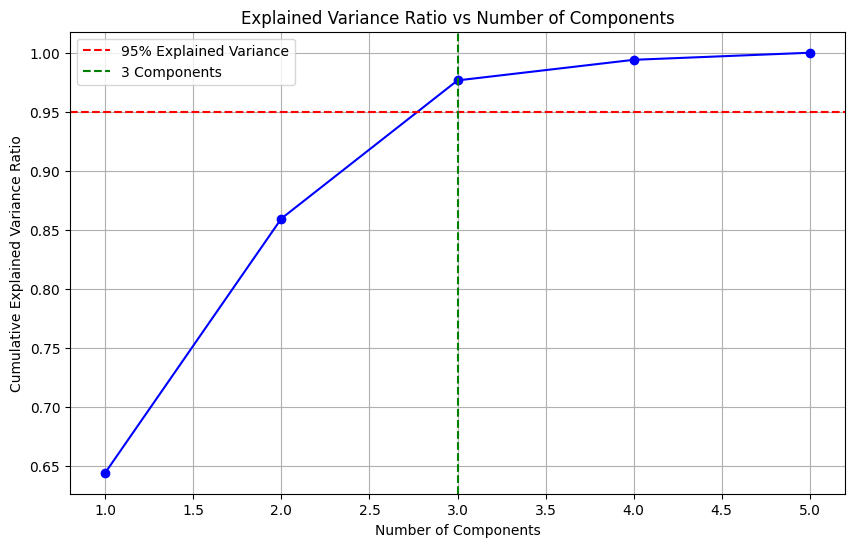

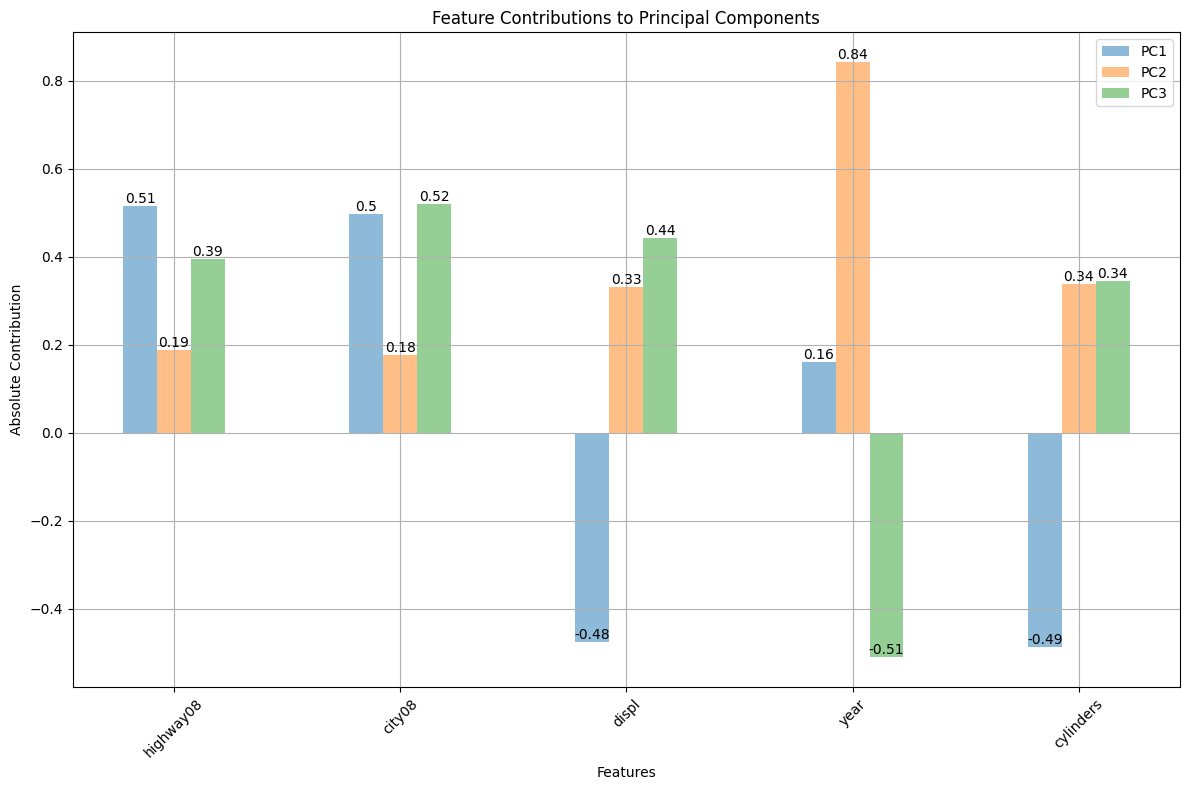

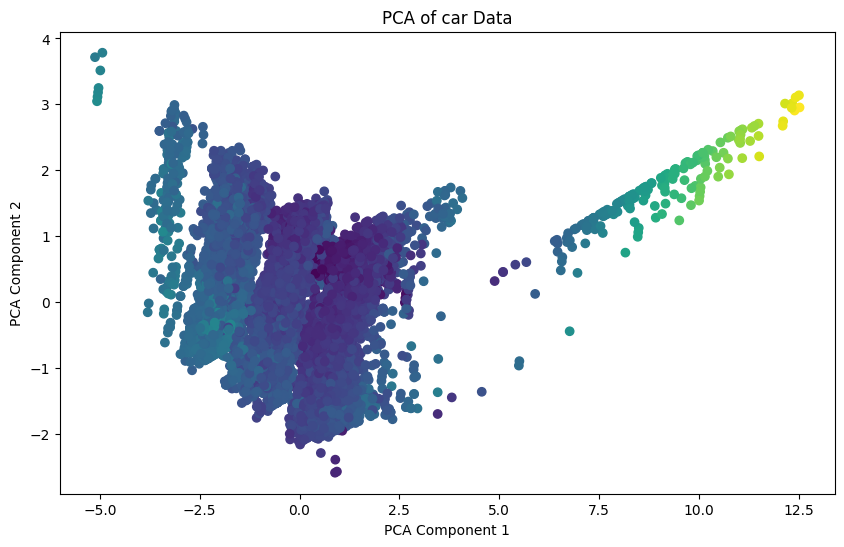

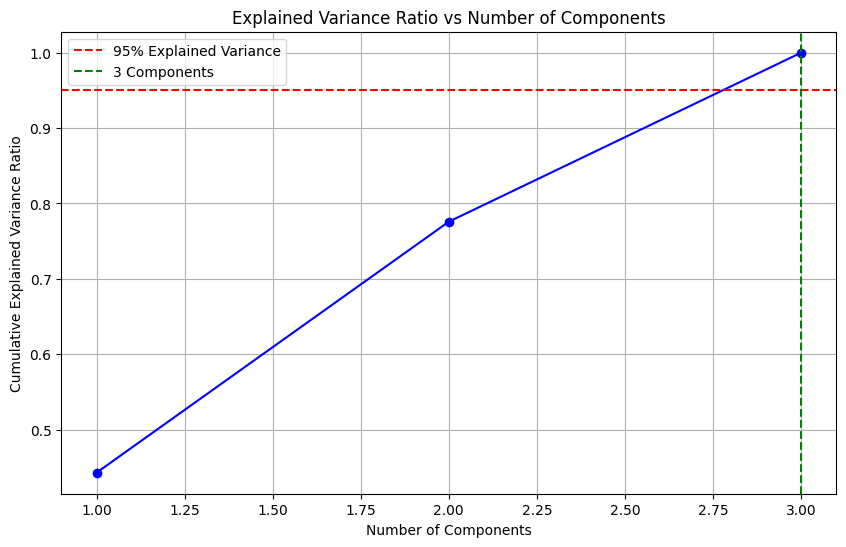

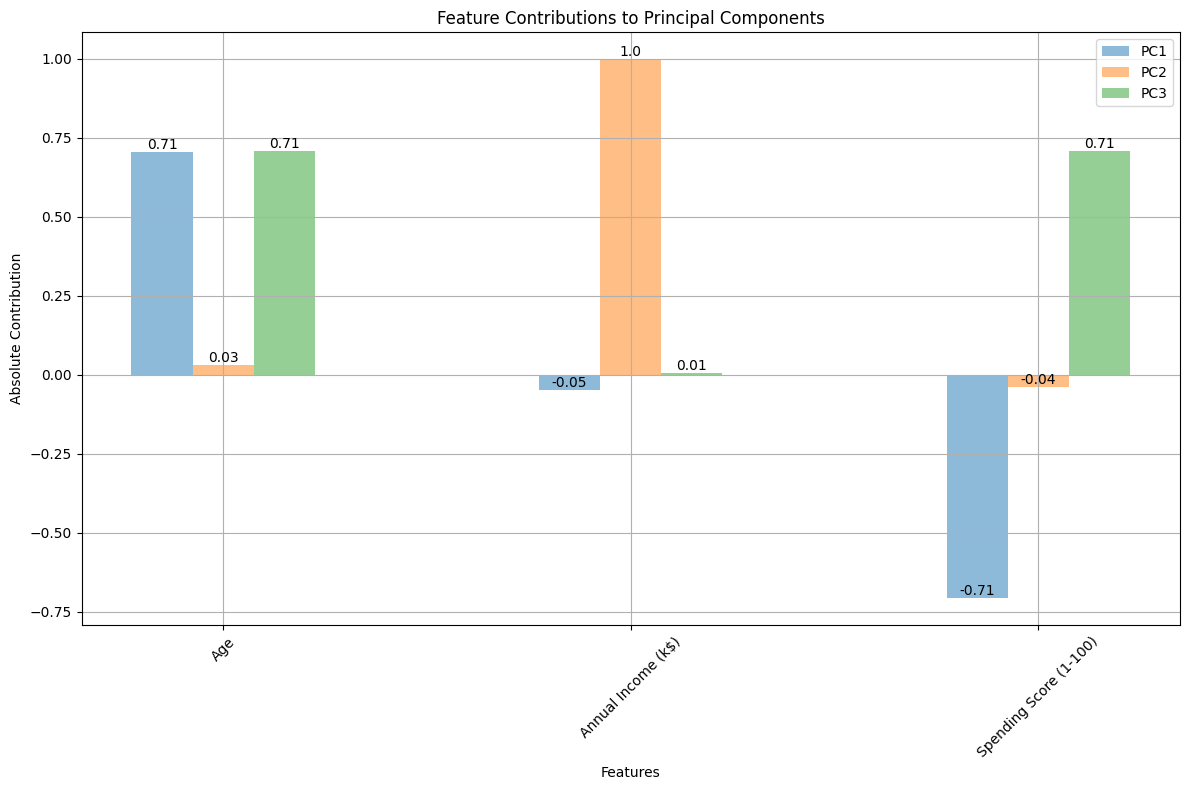

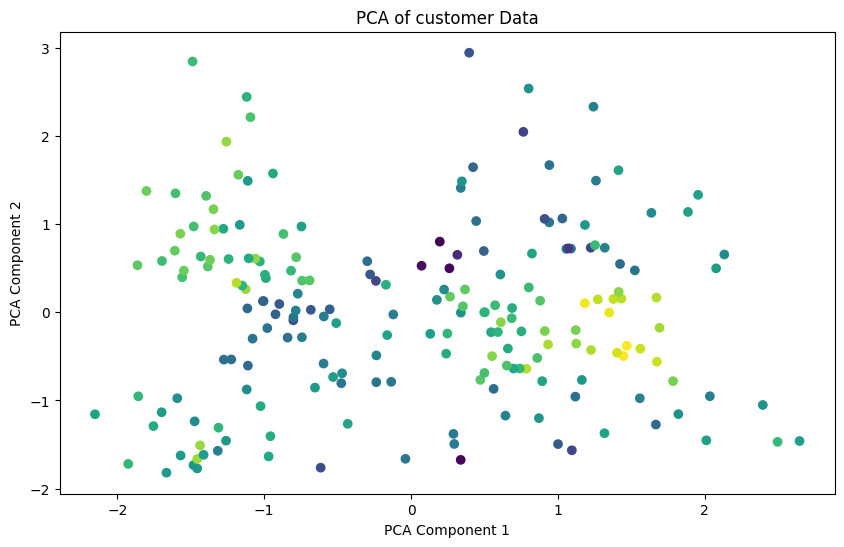

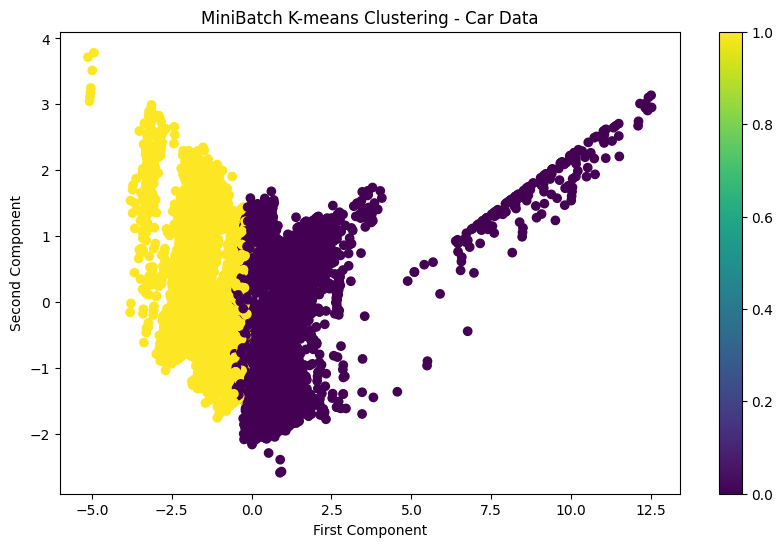

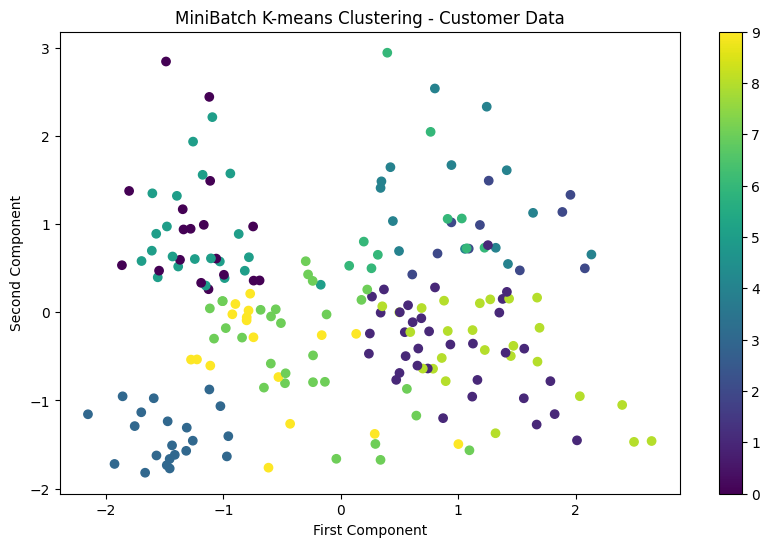

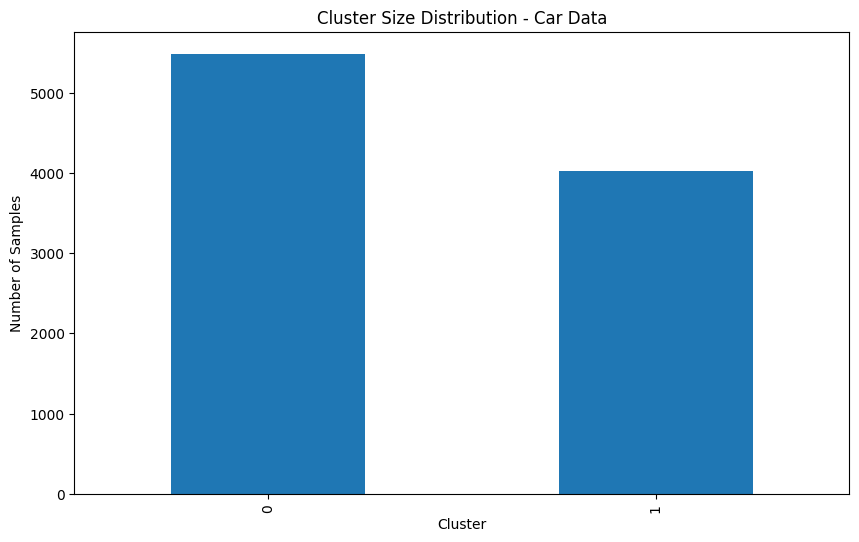


Cluster Statistics - Car Data:
                0                         1                         2  \
             mean       std count      mean       std count      mean   
Cluster                                                                 
0        1.030776  1.610132  5485 -0.193885  1.046302  5485 -0.255237   
1       -1.406420  0.808990  4020  0.264542  0.964126  4020  0.348252   

                                0  ...    86        87                  \
              std count      mean  ... count      mean       std count   
Cluster                            ...                                   
0        0.794972  5485  0.000365  ...  5485  0.000000  0.000000  5485   
1        0.556906  4020  0.002239  ...  4020  0.000249  0.015772  4020   

               88                        89                  
             mean       std count      mean       std count  
Cluster                                                      
0        0.000000  0.000000  5485  0.000365  

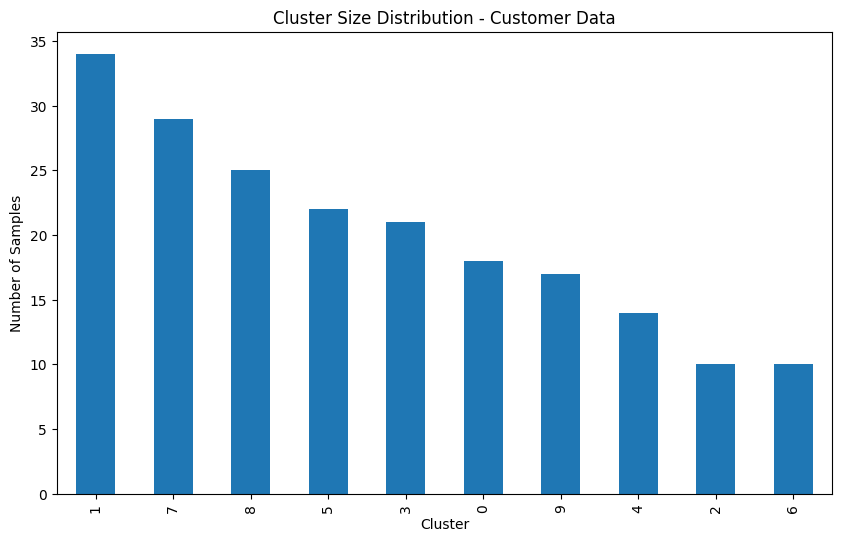


Cluster Statistics - Customer Data:
                0                         1                         2  \
             mean       std count      mean       std count      mean   
Cluster                                                                 
0       -1.221250  0.328010    18  0.952591  0.720424    18  0.613779   
1        0.938272  0.508613    34 -0.386886  0.511057    34  0.482421   
2        1.334404  0.506437    10  0.877390  0.374754    10 -0.289498   
3       -1.471247  0.312368    21 -1.406540  0.295070    21  0.104667   
4        1.000559  0.555262    14  1.301684  0.627158    14 -0.554013   
5       -1.198097  0.358996    22  0.883963  0.542716    22  0.519260   
6        0.623510  0.420745    10  1.106428  0.786105    10 -1.618810   
7       -0.304109  0.554720    29 -0.423251  0.651081    29 -0.765277   
8        1.289002  0.621156    25 -0.429740  0.517816    25  0.759402   
9       -0.568075  0.589395    17 -0.526256  0.607132    17 -0.648518   

             

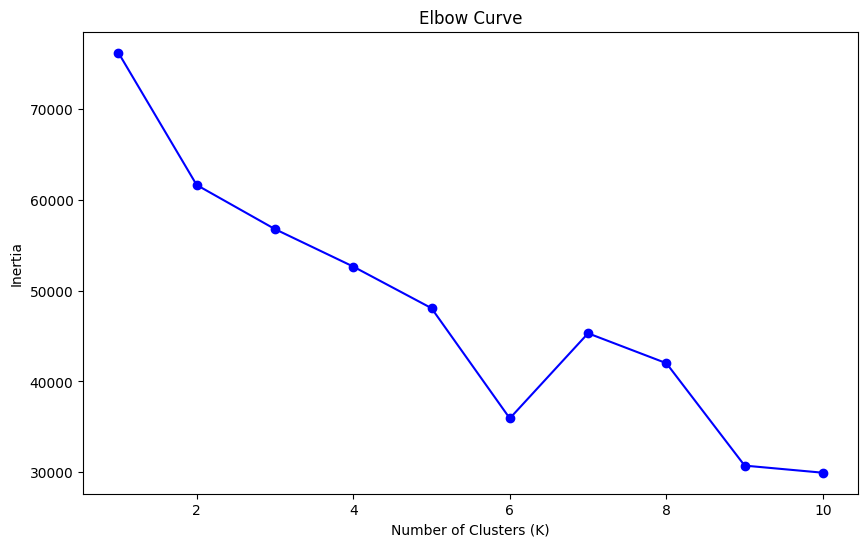

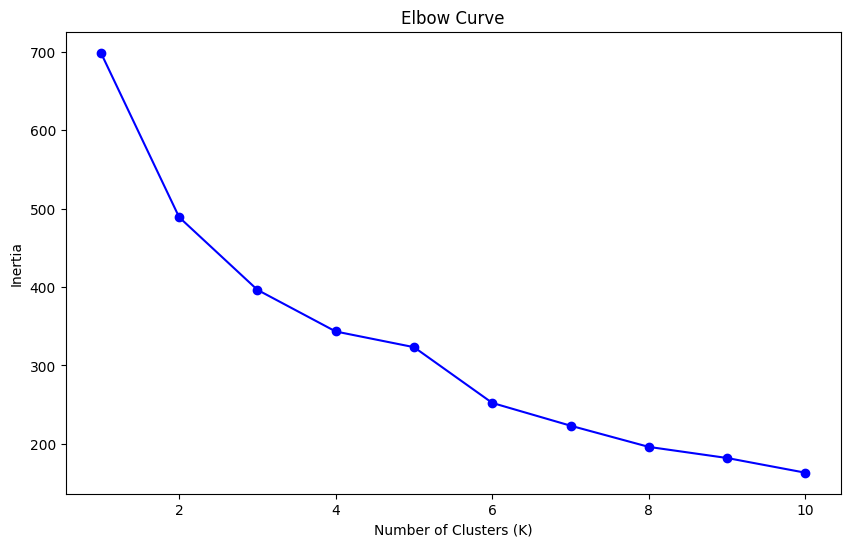

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)
from sklearn.preprocessing import StandardScaler
from src.prep import Prep

np.random.seed(47)

# Load and prepare data
prep = Prep(output_pca=True)
car_data = prep.prep_car
customer_data = prep.prep_customer


In [ ]:

def evaluate_minibatch_kmeans(data, n_clusters_range, batch_sizes, max_iter=100):
    """
    Evaluate MiniBatch K-means with different parameters using silhouette score
    """
    results = []
    
    for n_clusters in n_clusters_range:
        for batch_size in batch_sizes:
            mbk = MiniBatchKMeans(
                n_clusters=n_clusters,
                batch_size=batch_size,
                max_iter=max_iter,
                random_state=42
            )
            
            labels = mbk.fit_predict(data)
            score = silhouette_score(data, labels)
            
            results.append({
                'n_clusters': n_clusters,
                'batch_size': batch_size,
                'silhouette_score': score
            })
    
    return pd.DataFrame(results)

n_clusters_range = range(2, 11)
batch_sizes = [32, 64, 128, 256]

# Evaluate parameters for car data
car_results = evaluate_minibatch_kmeans(car_data, n_clusters_range, batch_sizes)
print("Best parameters for car data:")
print(car_results.loc[car_results['silhouette_score'].idxmax()])

# Evaluate parameters for customer data
customer_results = evaluate_minibatch_kmeans(customer_data, n_clusters_range, batch_sizes)
print("\nBest parameters for customer data:")
print(customer_results.loc[customer_results['silhouette_score'].idxmax()])

def plot_clustering_results(data, labels, title):
    """
    Visualize clustering results using first two dimensions
    """
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(f'MiniBatch K-means Clustering - {title}')
    plt.xlabel('First Component')
    plt.ylabel('Second Component')
    plt.show()

# Apply best parameters to car data
best_car_params = car_results.loc[car_results['silhouette_score'].idxmax()]
mbk_car = MiniBatchKMeans(
    n_clusters=int(best_car_params['n_clusters']),
    batch_size=int(best_car_params['batch_size']),
    random_state=42
)
car_labels = mbk_car.fit_predict(car_data)

# Apply best parameters to customer data
best_customer_params = customer_results.loc[customer_results['silhouette_score'].idxmax()]
mbk_customer = MiniBatchKMeans(
    n_clusters=int(best_customer_params['n_clusters']),
    batch_size=int(best_customer_params['batch_size']),
    random_state=42
)
customer_labels = mbk_customer.fit_predict(customer_data)

# Plot results
plot_clustering_results(car_data, car_labels, 'Car Data')
plot_clustering_results(customer_data, customer_labels, 'Customer Data')

def analyze_clusters(data, labels, title):
    """
    Analyze cluster characteristics
    """
    data_with_labels = data.copy()
    data_with_labels['Cluster'] = labels
    
    cluster_sizes = data_with_labels['Cluster'].value_counts()

    plt.figure(figsize=(10, 6))
    cluster_sizes.plot(kind='bar')
    plt.title(f'Cluster Size Distribution - {title}')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Samples')
    plt.show()
    
    cluster_stats = data_with_labels.groupby('Cluster').agg(['mean', 'std', 'count'])
    print(f"\nCluster Statistics - {title}:")
    print(cluster_stats)

# Analyze clustering results
analyze_clusters(car_data, car_labels, 'Car Data')
analyze_clusters(customer_data, customer_labels, 'Customer Data')

# Plot elbow curve for different K values
def plot_elbow_curve(data, max_k, batch_size):
    """
    Plot elbow curve to help determine optimal K
    """
    inertias = []
    k_values = range(1, max_k + 1)
    
    for k in k_values:
        mbk = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, random_state=42)
        mbk.fit(data)
        inertias.append(mbk.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertias, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Curve')
    plt.show()

# Plot elbow curves
plot_elbow_curve(car_data, 10, 64)
plot_elbow_curve(customer_data, 10, 64)


Evaluating clustering for Car Data


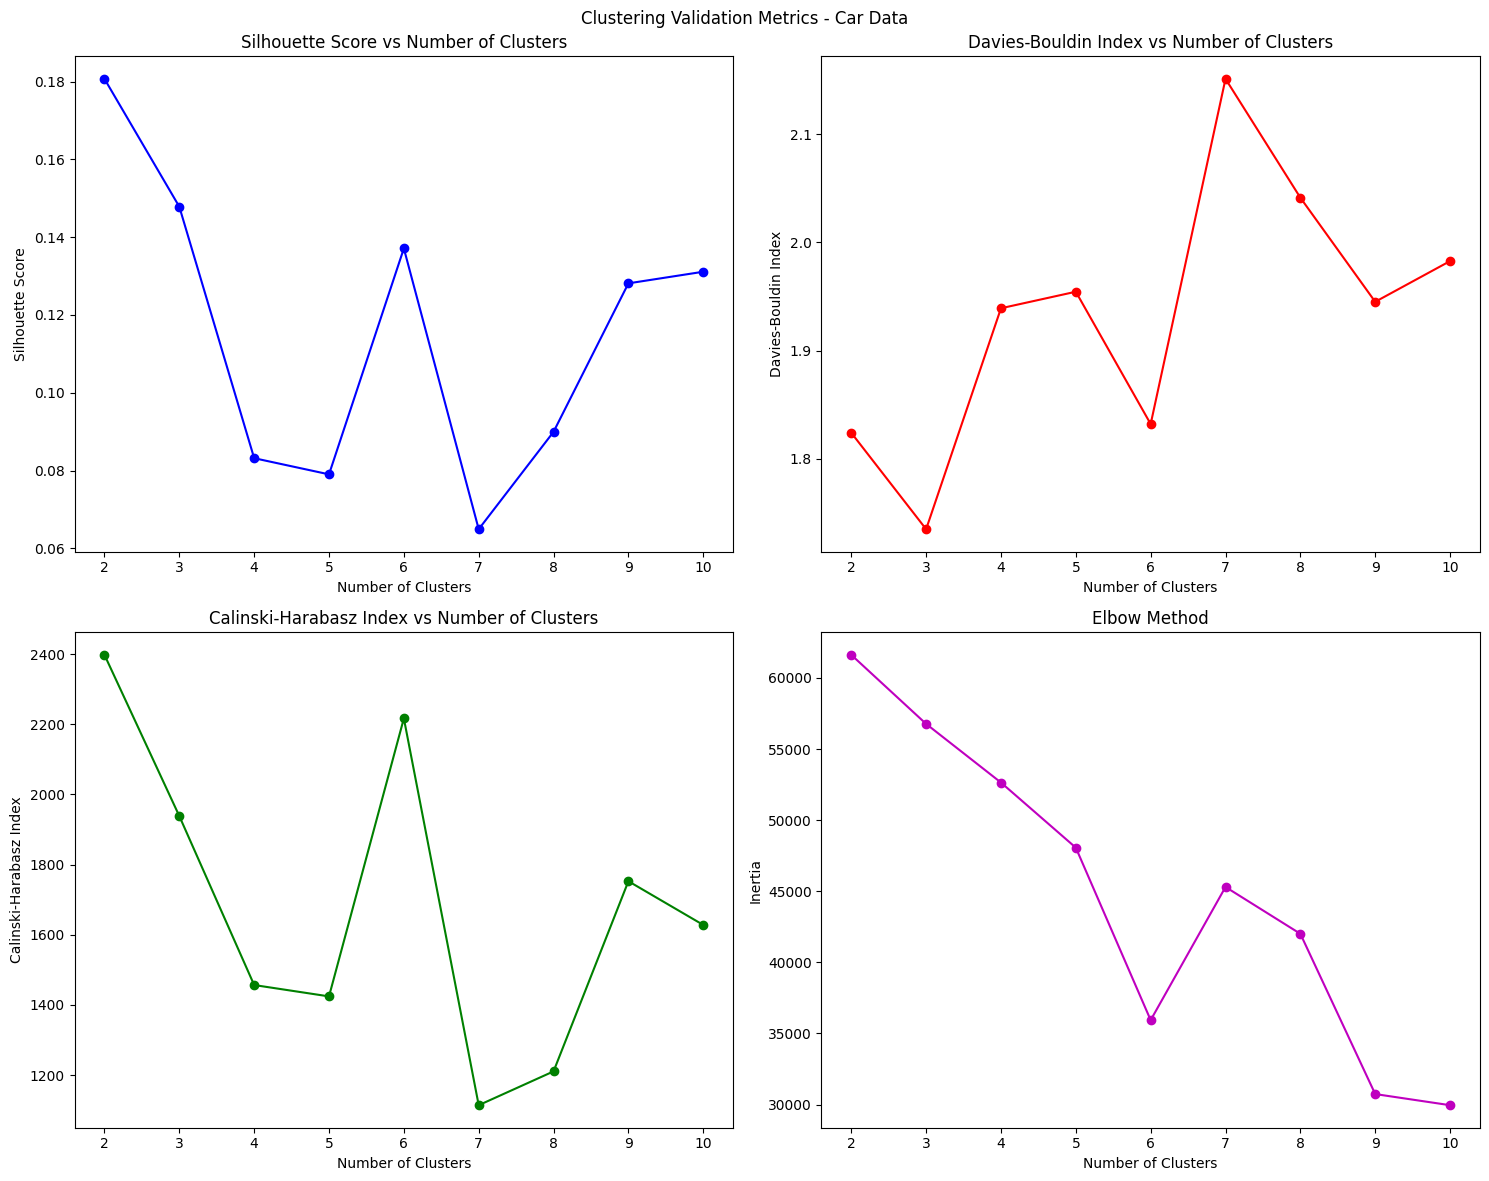


Optimal number of clusters:
Based on Silhouette Score: 2
Based on Davies-Bouldin Index: 3
Based on Calinski-Harabasz Index: 2


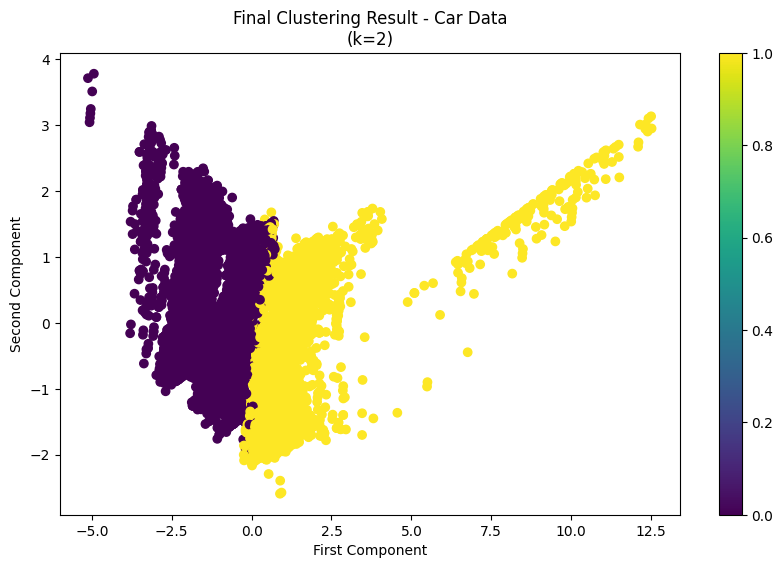


Detailed metrics for k=2:
silhouette: 0.2013
davies_bouldin: 1.7295
calinski_harabasz: 2653.2732

Evaluating clustering for Customer Data


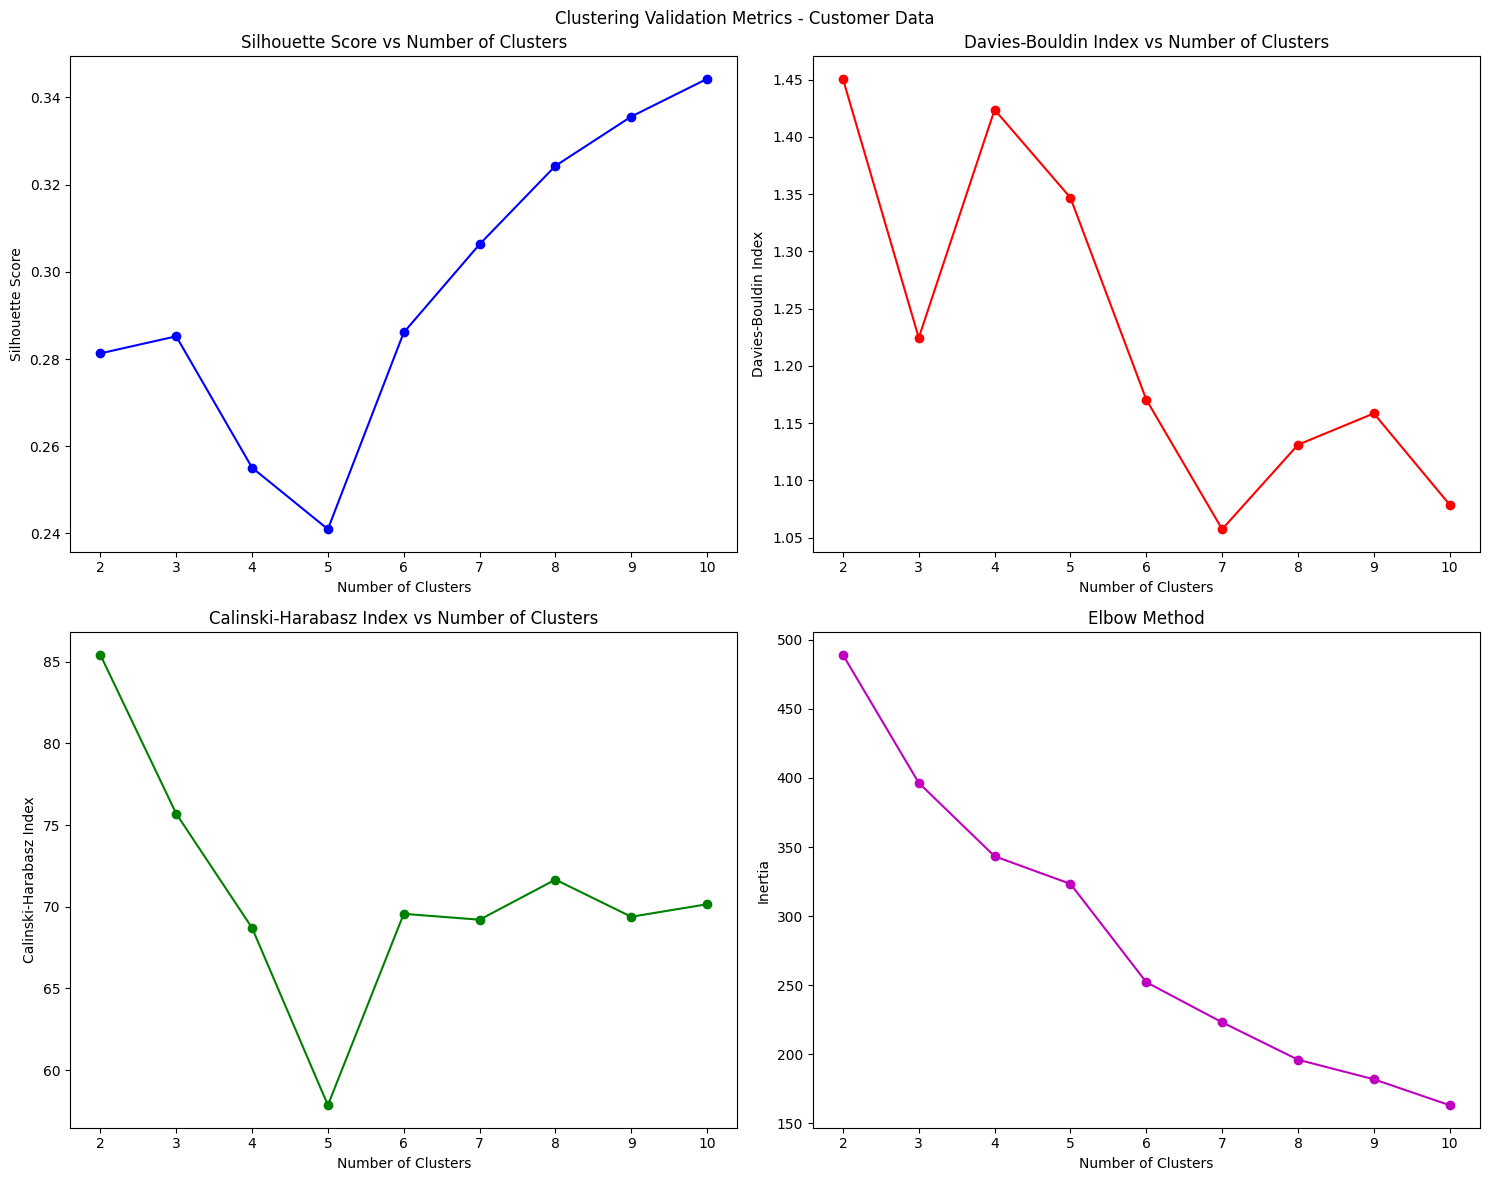


Optimal number of clusters:
Based on Silhouette Score: 10
Based on Davies-Bouldin Index: 7
Based on Calinski-Harabasz Index: 2


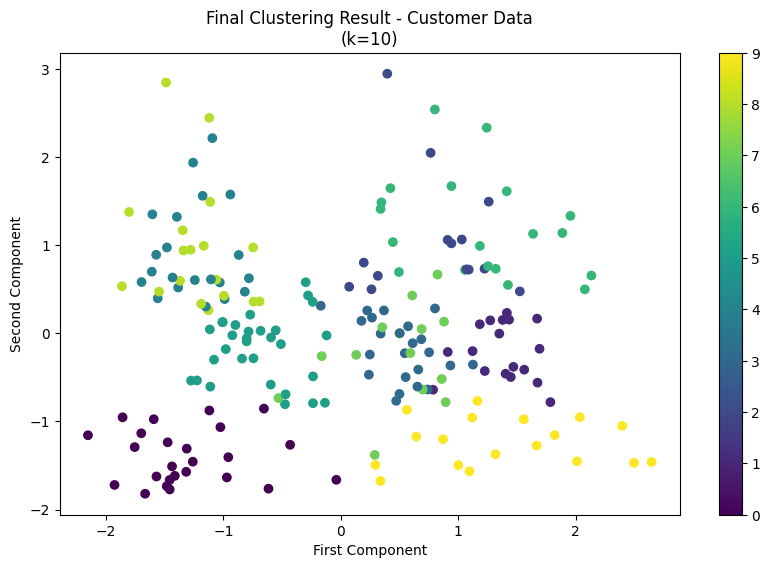


Detailed metrics for k=10:
silhouette: 0.3314
davies_bouldin: 1.0632
calinski_harabasz: 71.4106


In [2]:
def compute_validation_metrics(data, labels):
    """
    Compute multiple clustering validation metrics
    """
    metrics = {
        'silhouette': silhouette_score(data, labels),
        'davies_bouldin': davies_bouldin_score(data, labels),
        'calinski_harabasz': calinski_harabasz_score(data, labels)
    }
    return metrics

def evaluate_clustering(data, n_clusters_range, batch_size=64):
    """
    Evaluate clustering using multiple validation metrics
    """
    results = []
    
    for n_clusters in n_clusters_range:
        # Fit MiniBatch K-means
        mbk = MiniBatchKMeans(
            n_clusters=n_clusters,
            batch_size=batch_size,
            random_state=42
        )
        labels = mbk.fit_predict(data)
        
        # Calculate validation metrics
        metrics = compute_validation_metrics(data, labels)
        metrics['n_clusters'] = n_clusters
        metrics['inertia'] = mbk.inertia_
        
        results.append(metrics)
    
    return pd.DataFrame(results)

def plot_validation_metrics(results, title):
    """
    Plot all validation metrics
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'Clustering Validation Metrics - {title}')
    
    # Silhouette Score (higher is better)
    axes[0, 0].plot(results['n_clusters'], results['silhouette'], 'bo-')
    axes[0, 0].set_xlabel('Number of Clusters')
    axes[0, 0].set_ylabel('Silhouette Score')
    axes[0, 0].set_title('Silhouette Score vs Number of Clusters')
    
    # Davies-Bouldin Index (lower is better)
    axes[0, 1].plot(results['n_clusters'], results['davies_bouldin'], 'ro-')
    axes[0, 1].set_xlabel('Number of Clusters')
    axes[0, 1].set_ylabel('Davies-Bouldin Index')
    axes[0, 1].set_title('Davies-Bouldin Index vs Number of Clusters')
    
    # Calinski-Harabasz Index (higher is better)
    axes[1, 0].plot(results['n_clusters'], results['calinski_harabasz'], 'go-')
    axes[1, 0].set_xlabel('Number of Clusters')
    axes[1, 0].set_ylabel('Calinski-Harabasz Index')
    axes[1, 0].set_title('Calinski-Harabasz Index vs Number of Clusters')
    
    # Elbow Method
    axes[1, 1].plot(results['n_clusters'], results['inertia'], 'mo-')
    axes[1, 1].set_xlabel('Number of Clusters')
    axes[1, 1].set_ylabel('Inertia')
    axes[1, 1].set_title('Elbow Method')
    
    plt.tight_layout()
    plt.show()

# Evaluate clustering for both datasets
n_clusters_range = range(2, 11)
datasets = {
    'Car Data': car_data,
    'Customer Data': customer_data
}

for name, data in datasets.items():
    print(f"\nEvaluating clustering for {name}")
    
    # Compute and plot validation metrics
    results = evaluate_clustering(data, n_clusters_range)
    plot_validation_metrics(results, name)
    
    # Find optimal number of clusters based on different metrics
    best_silhouette = results.loc[results['silhouette'].idxmax()]
    best_davies_bouldin = results.loc[results['davies_bouldin'].idxmin()]
    best_calinski = results.loc[results['calinski_harabasz'].idxmax()]
    
    print("\nOptimal number of clusters:")
    print(f"Based on Silhouette Score: {int(best_silhouette['n_clusters'])}")
    print(f"Based on Davies-Bouldin Index: {int(best_davies_bouldin['n_clusters'])}")
    print(f"Based on Calinski-Harabasz Index: {int(best_calinski['n_clusters'])}")

    # Plot final clustering with optimal k (using silhouette score)
    optimal_k = int(best_silhouette['n_clusters'])
    mbk = MiniBatchKMeans(n_clusters=optimal_k, random_state=42)
    labels = mbk.fit_predict(data)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis')
    plt.title(f'Final Clustering Result - {name}\n(k={optimal_k})')
    plt.xlabel('First Component')
    plt.ylabel('Second Component')
    plt.colorbar()
    plt.show()

    # Print detailed metrics for optimal k
    print(f"\nDetailed metrics for k={optimal_k}:")
    final_metrics = compute_validation_metrics(data, labels)
    for metric_name, value in final_metrics.items():
        print(f"{metric_name}: {value:.4f}")

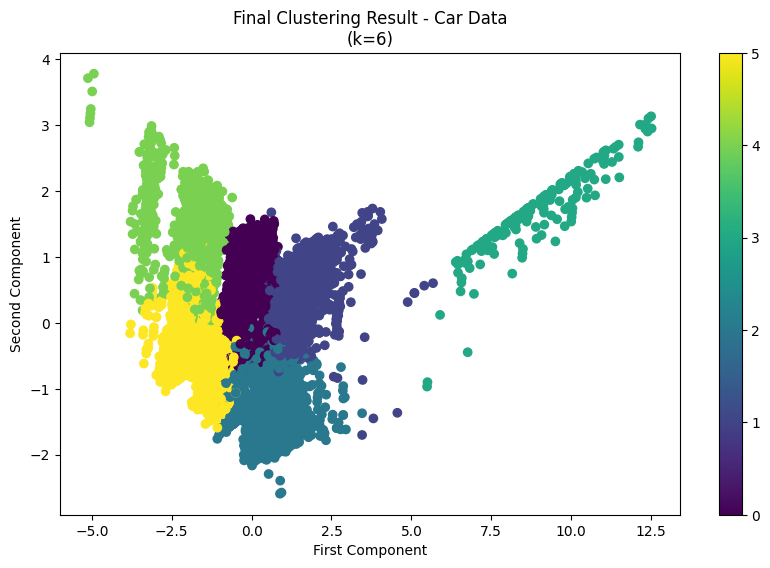

In [5]:
mbk = MiniBatchKMeans(n_clusters=6, random_state=42)
labels = mbk.fit_predict(car_data)

plt.figure(figsize=(10, 6))
plt.scatter(car_data.iloc[:, 0], car_data.iloc[:, 1], c=labels, cmap='viridis')
plt.title(f'Final Clustering Result - Car Data\n(k={6})')
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.colorbar()
plt.show()

In [6]:
final_metrics = compute_validation_metrics(car_data, labels)
for metric_name, value in final_metrics.items():
    print(f"{metric_name}: {value:.4f}")

silhouette: 0.1678
davies_bouldin: 1.6944
calinski_harabasz: 2374.8564
